# Laboratório de Financas
### by Luis Gustavo Ribeiro Andrade

## Introdução

O avanço na tecnologia nos permite fazer de forma muito mais rápida e automática várias coisas, e em um sistema que agilidade de captar e interpretar informações são tão importantes, o uso de Dados para tomada de decisões vem sendo cada vez mais utilizado no dia a dia. 
A partir disso, usa-se de algumas técnicas de análise dos dados para otimizar os resultados dos seus investimentos. Tentaremos ao longo deste trabalho desenvolver algumas dessas técnicas.

# Importando bibliotecas que usaremos

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Escolha dos ativos

Precisaremos começar a escolher os nossos 20 ativos. Com isso, peguei entre os setores: Financeiro (ITSA4, BBDC4, SANB3, BBAS3), Bens Primários/Commodities (KLBN11, SUZB3, VALE3, CSNA3), Petróleo e correlacionados (PETR4, PRIO3, CSAN3, UGPA3), Saúde (BIOM3, BALM4, FLRY3, ODPV3) e Transporte (AZUL4, JLSG3, MRSA5B, ECOR3). Usaremos o yfinance para pegarmos esses ativos.

In [5]:
from datetime import date, timedelta
today = date.today().strftime("%Y-%m-%d")
start_date = date.today()-timedelta(days=1826)
start_date = start_date.strftime("%Y-%m-%d")

In [6]:
ativos_selecionados = ['ITSA4.SA', 'BBDC4.SA', 'SANB3.SA', 'BBAS3',
                       'KLBN11', 'SUZB3', 'VALE3', 'CSNA3',
                       'PETR4.SA', 'PRIO3.SA', 'CSAN3.SA', 'UGPA3.SA',
                       'BIOM3.SA', 'BALM4.SA', 'FLRY3.SA', 'ODPV3.SA',
                       'AZUL4.SA', 'JLSG3.SA', 'MRSA5B.SA', 'ECOR3.SA']
dados = yf.download(ativos_selecionados, start=start_date, end=today)
dados

[*********************100%%**********************]  20 of 20 completed


6 Failed downloads:
['BBAS3', 'CSNA3', 'JLSG3.SA', 'KLBN11', 'SUZB3', 'VALE3']: Exception('%ticker%: No timezone found, symbol may be delisted')


Adj Close                                                         \
             AZUL4.SA   BALM4.SA BBAS3   BBDC4.SA  BIOM3.SA   CSAN3.SA CSNA3   
Date                                                                           
2019-08-13  53.549999  10.662709   NaN  18.958611  7.217718  11.241579   NaN   
2019-08-14  50.970001  10.662709   NaN  18.586109  7.390712  10.629195   NaN   
2019-08-15  50.560001  10.662709   NaN  18.458229  7.198496  10.616074   NaN   
2019-08-16  50.470001  10.662709   NaN  18.497150  7.121610  10.845716   NaN   
2019-08-19  49.830002  10.662709   NaN  18.230289  7.015891  10.847904   NaN   
...               ...        ...   ...        ...       ...        ...   ...   
2024-08-05   7.730000   9.800000   NaN  13.610000  9.220000  12.800000   NaN   
2024-08-06   7.780000   9.800000   NaN  14.060000  9.100000  13.000000   NaN   
2024-08-07   7.780000   9.800000   NaN  14.090000  8.780000  13.190000   NaN   
2024-08-08   7.660000   9.850000   NaN  14.250000  9.100000  13.300000   NaN   
2024-08-09   7.950000   9.850000   NaN  14.600000  9.780000  13.610000   NaN   

                                             ...   Volume                   \
             ECOR3.SA   FLRY3.SA   ITSA4.SA  ... JLSG3.SA KLBN11 MRSA5B.SA   
Date                                         ...                             
2019-08-13  11.493734  19.161690   7.880688  ...      NaN    NaN         0   
2019-08-14  11.056784  18.770472   7.776995  ...      NaN    NaN         0   
2019-08-15  11.028287  18.131752   7.807494  ...      NaN    NaN         0   
2019-08-16  11.332253  18.794422   7.839140  ...      NaN    NaN         0   
2019-08-19  11.161272  18.522964   7.701281  ...      NaN    NaN         0   
...               ...        ...        ...  ...      ...    ...       ...   
2024-08-05   7.340000  15.240000   9.820000  ...      NaN    NaN         0   
2024-08-06   7.700000  15.140000  10.030000  ...      NaN    NaN         0   
2024-08-07   7.800000  15.310000  10.080000  ...      NaN    NaN         0   
2024-08-08   7.740000  15.560000  10.080000  ...      NaN    NaN         0   
2024-08-09   7.850000  15.850000  10.350000  ...      NaN    NaN         0   

                                                                        
           ODPV3.SA  PETR4.SA  PRIO3.SA SANB3.SA SUZB3  UGPA3.SA VALE3  
Date                                                                    
2019-08-13  1002210  45330500   5018000     5080   NaN  12316011   NaN  
2019-08-14  1323080  54401100   6777500     5080   NaN  20121310   NaN  
2019-08-15  1797070  53894500  15233500     2857   NaN  28877718   NaN  
2019-08-16  1196690  56782000  10329500     2857   NaN  11642725   NaN  
2019-08-19  2070750  50699300   7879500     2751   NaN  14004652   NaN  
...             ...       ...       ...      ...   ...       ...   ...  
2024-08-05  1400200  44765900  12727300   271700   NaN   9106600   NaN  
2024-08-06  1768800  36009000  14420700    62500   NaN   8325700   NaN  
2024-08-07  1531900  25020500  10045600   165900   NaN  11822600   NaN  
2024-08-08   990600  29870300   7337800    39600   NaN  18239500   NaN  
2024-08-09   643900  66082100  14573600    49900   NaN   6194200   NaN  

[1243 rows x 120 columns]

In [7]:
retorno = dados['Adj Close'].reset_index().T.dropna().T
retorno = retorno.set_index('Date')
média = retorno.mean()
dp = retorno.std()
var_ativos = pd.concat([média, dp], axis=1)
var_ativos.columns = ['Retorno', 'Volatilidade']
var_ativos

,Retorno,Volatilidade
AZUL4.SA,25.088053,14.223406
BALM4.SA,10.816718,2.254198
BBDC4.SA,15.592748,2.414796
BIOM3.SA,10.781495,4.335509
CSAN3.SA,16.961321,2.89444
ECOR3.SA,8.992722,3.150305
FLRY3.SA,17.687251,3.528817
ITSA4.SA,7.614056,1.18077
MRSA5B.SA,24.687728,9.232269
ODPV3.SA,10.614852,1.209112


c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

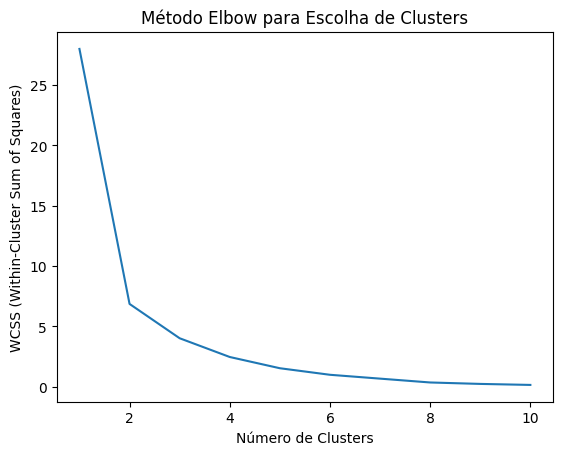

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(var_ativos)

# Calculando a soma dos quadrados das distâncias intra-cluster para diferentes valores de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico Elbow
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow para Escolha de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [11]:
kmean = KMeans(n_clusters=4)
kmean.fit(var_ativos)
labels = kmean.labels_

var_ativos['Cluster'] = labels

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Volatilidade', ylabel='Retorno'>

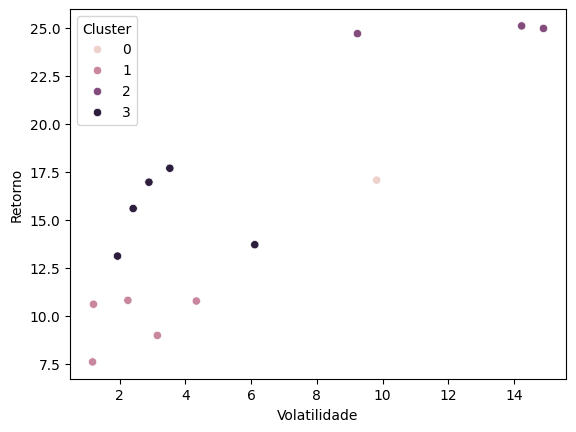

In [12]:
sns.scatterplot(x = var_ativos['Volatilidade'], y = var_ativos['Retorno'], hue = var_ativos['Cluster'])

Nossa escolha de 5 ativos serão os ativos com melhores índices de sharpe, faremos um cálculo do índice de Sharpe para os ativos abaixo.

In [13]:
risk_free = 0.1275
var_ativos['Índice de Sharpe']=(var_ativos['Retorno']-risk_free)/var_ativos['Volatilidade']

Pelo Índice de Sharpe, quanto maior o valor, melhor o retorno.

In [14]:
var_ativos = var_ativos.sort_values(by='Índice de Sharpe', ascending=False)
ativos_escolhidos = var_ativos[:5]
ativos_escolhidos

,Retorno,Volatilidade,Cluster,Índice de Sharpe
ODPV3.SA,10.614852,1.209112,1,8.673601
SANB3.SA,13.118035,1.939232,3,6.698802
BBDC4.SA,15.592748,2.414796,3,6.40437
ITSA4.SA,7.614056,1.18077,1,6.340403
CSAN3.SA,16.961321,2.89444,3,5.815917


Agora temos que escolhemos os nossos ativos através de riscos baixos definidos pela nossa escolha do Índice de Sharpe e pela clusterização por KMeans, que nos ranqueou os riscos dos ativos, onde conseguimos escolher ativos com risco menor pelo Cluster. Sendo que quanto maior o risco, maior o Cluster atribuído.

<Axes: xlabel='Volatilidade', ylabel='Retorno'>

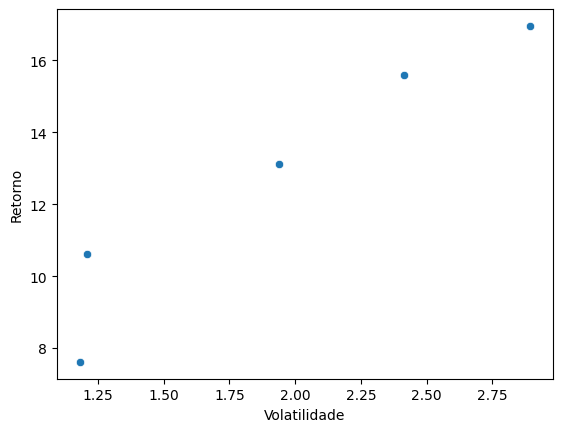

In [15]:
sns.scatterplot(x = ativos_escolhidos['Volatilidade'], y=ativos_escolhidos['Retorno'])

Agora, faremos uma análise das correlações dos ativos que nos foi selecionado pelo método de clusterização.
Para isso, precisamos utilizar os dados brutos do retorno, com todas as datas.

In [16]:
escolhidos = list(ativos_escolhidos.index)
retorno_escolhidos = retorno.drop(retorno.columns.difference(escolhidos), axis=1)
retorno_escolhidos = retorno_escolhidos.dropna()
retorno_escolhidos = retorno_escolhidos.astype(float)
retorno_escolhidos.dtypes

BBDC4.SA    float64
CSAN3.SA    float64
ITSA4.SA    float64
ODPV3.SA    float64
SANB3.SA    float64
dtype: object

<Axes: >

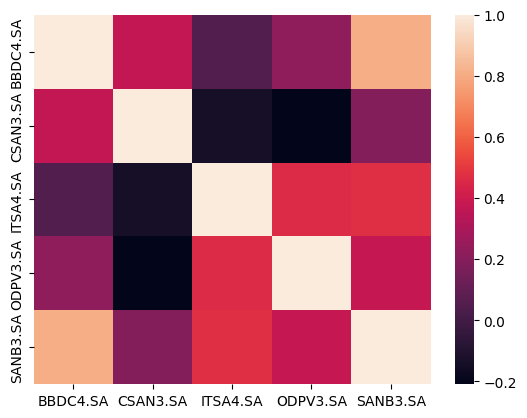

In [17]:
correlacao_escolhidos = retorno_escolhidos.corr()
sns.heatmap(correlacao_escolhidos)

Podemos perceber que minimizando os riscos encontrados pelo método de Cluster em KMeans, os setores que mais apareceu entre nossos ativos de baixo risco com bons retornos em comparação com o Risk Free(Selic) foi o Setor Financeiro, mais especificamente os Bancários, outro setor que apareceu forte também foi o setor de saúde.

## Conclusão

Diante nosso código para cálcular os principais ativos de uma série de 20 ativos e selecionar os 5 ativos com mais retorno/risco.

## Referências

[1] Chat-GPT: Fiz uso do Chat-GPT para responder dúvidas pontuais e me trazer alguns códigos que não estavam rodando.

[2] https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/: Usei o link acima para ter um conhecimento maior sobre o scikit-learn.